In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import requests
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
import cv2
import base64
import socket

Using TensorFlow backend.


In [2]:
#loading trained model in notebook
json_file = open('C:\\Users\\Admin\\Desktop\\soft tech project\\model.json','r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("C:\\Users\\Admin\\Desktop\\soft tech project\\model.h5")
print("Loaded model from disk")
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
output = {i:chr(i+65) for i in range(25)}
print(output)


Loaded model from disk
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'}


In [3]:
def imageShow(img):
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.imshow(img,cmap='gray')
    plt.show()

In [6]:
sock=socket.socket() 
PORT = 8001
HOST =socket.gethostname() 
sock.bind(("192.168.43.114", PORT))
sock.listen(5)
print("SERVER",HOST,str(PORT))
(clientsocket,address)=sock.accept()
print("Connection Established")
running=True
message=b""
while(running):
    print("Collecting data")
    mess=clientsocket.recv(15000)
    if not mess:
        break
    message=message+mess
print("DATA SIZE",len(message))
imgdata = base64.b64decode(message)
filename = 'handimage1.jpg'
with open(filename, 'wb') as f:
    f.write(imgdata)
    f.close()
    running=False
    sock.close()
    print("IMAGE RECIEVED")

SERVER LAPTOP-4VLR1O05 8001
Connection Established
DATA SIZE 40385
IMAGE RECIEVED


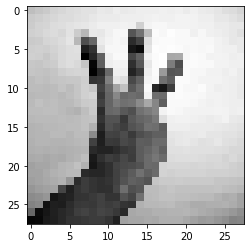

SERVER LAPTOP-4VLR1O05 8001
Connection Established


'W'

In [7]:
def determineLetter():
    image = cv2.imread("handimage1.jpg")
    new = cv2.rotate(image,rotateCode = 0)
    gimage = cv2.cvtColor(new, cv2.COLOR_BGR2GRAY)
    image28=cv2.resize(gimage,(28,28))
    imageShow(image28)
    imagere = image28.reshape(1,28,28,1)
    onehot=model.predict_classes(imagere)
    sock=socket.socket() 
    PORT = 8001
    HOST =socket.gethostname() 
    sock.bind(("192.168.43.114", PORT))
    sock.listen(5)
    print("SERVER",HOST,str(PORT))
    (clientsocket,address)=sock.accept()
    print("Connection Established")
    message=""+output[onehot[0]]
    clientsocket.send(message.encode())
    return output[onehot[0]]
determineLetter()